# Naive exact matching plus reverse complement

The goal is to implement the naive exact matching algorithm that is strand-aware. Meaning, it will look for occurrences of the target sequence in the genome, along with the reverse complement of the sequence. 

In [16]:
from collections import Counter

In [1]:
def readFastq(filename):
    '''Parses read and quality strings from FASTQ file format.'''
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [2]:
def reverseComplement(sequence):
    '''Creates reverse complement sequence from input sequence'''
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    reversed_seq = ''
    for base in sequence:
        reversed_seq = complement[base] + reversed_seq
    return reversed_seq

In [3]:
def readGenome(filename):
    '''Parses DNA sequence from FASTA file format.'''
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [24]:
def reverse(s):
  str = ""
  for i in s:
    str = i + str
  return str

In [50]:
def naive(pattern, text):
    occurrences = []
    for i in range(len(text) - len(pattern) + 1):  # loop over alignments
        match = True
        for j in range(len(pattern)):  # loop over characters
            if text[i+j] != pattern[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [52]:
def naive_2mm(pattern, text):
    occurrences = []
    for i in range(len(text) - len(pattern) + 1):  # loop over alignments
        match = True
        mismatch = 0
        for j in range(len(pattern)):  # loop over characters
            if text[i+j] != pattern[j]:  # compare characters
                mismatch += 1
            if mismatch > 2:
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [34]:
def naive_with_rc(pattern, text):
    '''Execute exact matching algorithm on given pattern and its reverse complement.'''
    occurrences = []
    rev_comp = reverseComplement(p)
    check_equal = reverse(rev_comp)
    
    for i in range(len(text) - len(pattern) + 1):  # loop over alignments
        match = True  # initialize to true
        for j in range(len(pattern)):  # loop over characters
            if pattern != check_equal:
                if text[i+j] != pattern[j] and text[i+j] != rev_comp[j]:  # compare characters
                    match = False
                    break
            elif text[i+j] != pattern[j]:
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [69]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [70]:
def createHist(qualities):
    hist = [0] * 50  # highest is 41, 50 for padding
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [35]:
# test scenario 1
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [36]:
# test scenario 2
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [37]:
# test scenario 3
# Phi-X genome
# !wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

In [38]:
phix_genome = readGenome('phix.fa')

In [39]:
occurrences = naive_with_rc('ATTA', phix_genome)

In [40]:
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 7
# occurrences: 285


In [11]:
# download and parse lambda virus
# !wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [12]:
lambda_genome = readGenome('lambda_virus.fa')

In [63]:
# question 1
p1 = 'AGGT'
q1_occurrences = naive(p1, lambda_genome)
q1_occurrences2 = naive(reverseComplement(p1), lambda_genome)
print(len(q1_occurrences) + len(q1_occurrences2))

306


In [45]:
# question 2
p2 = 'TTAA'
q2_occurrences = naive(p2, lambda_genome)
print(len(q2_occurrences))

195


In [48]:
# question 3
p3 = 'ACTAAGT'
q3_occurrences = naive(p3, lambda_genome)
print(f'offset of leftmost occurrence: {min(q3_occurrences)}')
q3_occurrences2 = naive(reverseComplement(p3), lambda_genome)
print(f'offset of leftmost occurrence: {min(q3_occurrences2)}')

offset of leftmost occurrence: 27733
offset of leftmost occurrence: 26028


In [49]:
# question 4
p4 = 'AGTCGA'
q4_occurrences = naive(p4, lambda_genome)
print(f'offset of leftmost occurrence: {min(q4_occurrences)}')
q4_occurrences2 = naive(reverseComplement(p4), lambda_genome)
print(f'offset of leftmost occurrence: {min(q4_occurrences2)}')

offset of leftmost occurrence: 18005
offset of leftmost occurrence: 450


In [64]:
# question 5
p5 = 'TTCAAGCC'
q5_occurrences = naive_2mm(p5, lambda_genome)
print(len(q5_occurrences))

191


In [65]:
# question 6
p6 = 'AGGAGGTT'
q6_occurrences = naive_2mm(p6, lambda_genome)
print(f'offset of leftmost occurrence: {min(q6_occurrences)}')

offset of leftmost occurrence: 49


[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 39, 36, 39, 38, 39, 37, 39, 39, 28, 2, 28, 29, 29, 37, 37, 37, 37, 33, 40, 40, 39, 38, 36, 39, 36, 36, 38, 38, 36, 39, 29, 39, 38, 30, 25, 35, 30, 35, 33, 35, 37, 37, 33]


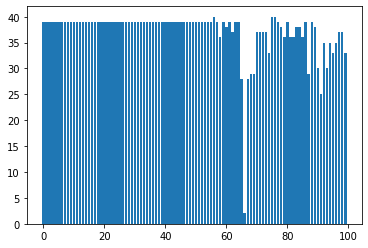

66


In [76]:
# question 7
#!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

def createHist(qualities):
    sequences, qualities = readFastq('ERR037900_1.first1000.fastq')
    phredscore = []
    qualities = qualities[-5]
    for phred in qualities:
        q = ord(phred)-33
        phredscore.append(q)
    return phredscore
h = createHist(qualities)
print (h)
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()
min_h = min(h)
index_min_h = h.index(min_h)
print(index_min_h)